# Regresión lineal con mínimos cuadrados

En este ejemplo aprenderemos a realizar un modelo de regresión lineal usando mínimos cuadrados.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random

Generamos un conjunto de datos empleando el módulo Random, muestreando unformemente 1000 ejemplos entre -5 y 5. Adicionalmente, generamos los valores de los parámetros de nuestra función. Finalmente, agregamos ruido Gaussiano.


In [4]:
# 1000 muestras de dos dimensiones usando una distribución uniforme
X = np.random.uniform(-5,5,(1000,3))
X[:, 0] = 1  # Agregar columna de unos

Fijamos los parámetros $\boldsymbol{\theta}$ manualmente a $[3, -1.0]$

In [5]:
# Generamos los valores de nuestros parámetros
theta_ori = np.array([[10.0],[3.0], [-1.0]])

Suponemos un modelo lineal con dos atributos, esto es,

$$
y_{i}=f_{\mathbf{\theta}}(x_{1},x_{2}) = \theta_{1}x_{1}+\theta_{2}x_{2}+\epsilon,
$$

In [6]:
Y = X.dot(theta_ori) + np.random.normal(loc=0.0, scale=1.0, size=(1000,1))

Recuerda que esto puede ser escrito en notación vectorial como

$$
f_{\mathbf{\theta}}(\mathbf{x}) = \boldsymbol{\theta}^\top \mathbf{x}+\mathbf{\epsilon},
$$

donde $\boldsymbol{\theta}$, $\mathbf{x}$ y $\mathbf{\epsilon}$ son vectores columna.

Graficamos los datos generados

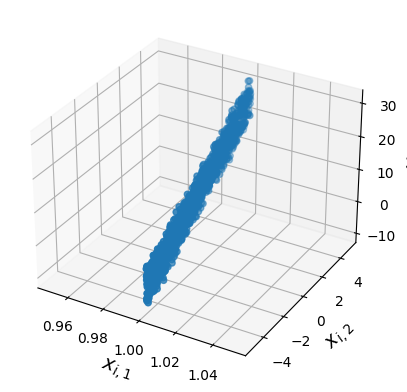

In [7]:
from mpl_toolkits.mplot3d import Axes3D # graficar en 3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# notice below when we use ":" it allows us to select all the elements along that dimension of the array
ax.scatter(X[:,0], X[:,1], Y[:,])
ax.set_xlabel("$x_{i,1}$", fontsize=14)
ax.set_ylabel("$x_{i,2}$", fontsize=14)
ax.set_zlabel('$y_{i}$', fontsize=14)
plt.show()

Generamos conjunto de entrenamiento y prueba (Método Hold out)

In [8]:
from sklearn.model_selection import train_test_split

# Dividimos nuestros datos (80% entrenamiento y 20% prueba):
X_test,X_train,y_test,y_train = train_test_split(X, Y, test_size=0.2, random_state=42)

Estimamos los parámetros por mínimos cuadrados
$$
\boldsymbol{\theta} = (\mathbf{X}^\top \mathbf{X})^{-1} \mathbf{X}^\top \mathbf{y}
$$

In [9]:
# Valores de Theta con mínimos cuadrados:
theta = np.linalg.inv(X_train.T @ X_train)@X_train.T@y_train
print(theta)

[[10.00809355]
 [ 3.00835592]
 [-1.00989684]]


Realizamos las predicciones sobre el conjunto de validación:

In [10]:
predictions = X_test @ theta
print(predictions)

[[ 1.00403151e+01]
 [ 7.32092418e+00]
 [ 1.57132155e+01]
 [ 1.27093146e+01]
 [ 1.90565429e+01]
 [-5.72563127e-01]
 [ 2.62682193e+01]
 [-6.40393459e+00]
 [ 1.72878661e+01]
 [ 2.13897287e+01]
 [ 2.11153702e+01]
 [ 1.11788187e+01]
 [ 2.14215674e+01]
 [ 1.96348361e+01]
 [ 1.83174305e+01]
 [ 1.61922564e+01]
 [ 9.92206250e+00]
 [ 1.43948398e+01]
 [ 2.00650828e-01]
 [ 2.73366234e+01]
 [ 1.73649935e+01]
 [-3.44516811e+00]
 [-1.11432647e+00]
 [ 1.77171238e+01]
 [ 4.08749612e-01]
 [ 1.92325290e+01]
 [-6.16789602e+00]
 [ 1.34510094e+01]
 [-3.29123423e+00]
 [ 1.46546069e+01]
 [ 1.80744317e+01]
 [ 1.93305204e+01]
 [ 1.48007253e+01]
 [ 1.50617053e+01]
 [-1.12694639e-01]
 [ 2.50751977e+00]
 [ 4.36965074e+00]
 [ 1.01723677e+01]
 [ 2.01132920e+01]
 [ 1.60710772e+01]
 [ 1.71309641e+01]
 [ 1.08676429e+00]
 [ 1.64515480e+00]
 [-1.43014354e+00]
 [ 1.27221220e+01]
 [ 5.79752114e+00]
 [-4.29003255e+00]
 [ 9.63658396e+00]
 [ 1.20432640e+01]
 [ 1.74862085e+01]
 [ 2.27572924e+01]
 [ 1.62414300e+01]
 [ 5.7409969

Definimos nuestra función de error, basada en el error cuadrático:

$$
E(\boldsymbol{\theta}) = \frac{1}{N}\sum_{i=1}^N (y_{i}-f_{\mathbf{\theta}}(\mathbf{x}_{i}))^2
$$

In [11]:
sse = lambda y_t, y_p: ((y_t - y_p)**2).mean()

Comparamos los valores estimados contra los valores reales empleando el Error cuadrático medio

In [12]:
ECM = sse(y_test,predictions)
print(ECM)

0.9695996956258445


Graficamos el ajuste del modelo de salida:

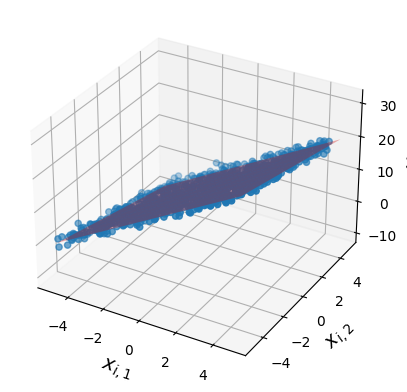

In [13]:
# Betas estimadas
beta0 = theta[0]
beta1 = theta[1]
beta2 = theta[2]

# Definir el plano
x_surf, y_surf = np.meshgrid(np.linspace(X[:, 1].min(), X[:, 1].max(), 10),
                             np.linspace(X[:, 2].min(), X[:, 2].max(), 10))
z_surf = beta0 + beta1 * x_surf + beta2 * y_surf

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Gráfico de puntos
ax.scatter(X[:, 1], X[:, 2], Y)

# Gráfico del plano
ax.plot_surface(x_surf, y_surf, z_surf, color='red', alpha=0.3)

ax.set_xlabel("$x_{i,1}$", fontsize=14)
ax.set_ylabel("$x_{i,2}$", fontsize=14)
ax.set_zlabel("$y_{i}$", fontsize=14)

plt.show()

In [14]:
print("Pesos calculados con Mínimos Cuadrados:\n", theta)

Pesos calculados con Mínimos Cuadrados:
 [[10.00809355]
 [ 3.00835592]
 [-1.00989684]]
